In [65]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from env import get_connection
from sklearn.model_selection import train_test_split

def get_db_connection(database):
    return get_connection(database)

In [66]:
def new_iris_data():
    sql_query = ("SELECT species_id, species_name, sepal_length, sepal_width, petal_length, petal_width FROM measurements JOIN species USING(species_id)")
    # Read in datafr from Codeup db.
    df = pd.read_sql(sql_query, get_connection('iris_db'))
    return df


In [67]:
def get_iris_data():
    if os.path.isfile('iris_df.csv'):
        # If csv file exists read in data from csv file.
        df = pd.read_csv('iris_df.csv', index_col=0)
    else:   
        # Read fresh data from Codeup db into a dataframe
        df = new_iris_data() 
        # Cache data
        df.to_csv('iris_df.csv')
    return df

In [68]:
iris_df = get_iris_data()
iris_df

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
145,3,virginica,6.7,3.0,5.2,2.3
146,3,virginica,6.3,2.5,5.0,1.9
147,3,virginica,6.5,3.0,5.2,2.0
148,3,virginica,6.2,3.4,5.4,2.3


In [69]:
from adam_prepare import train_val_test

In [70]:
#this function has already split my data
train, val, test = train_val_test(iris_df,
                                 'species_name')
#data splitted

In [76]:
train.shape, val.shape, test.shape

((105, 6), (22, 6), (23, 6))

<Axes: xlabel='species_name', ylabel='count'>

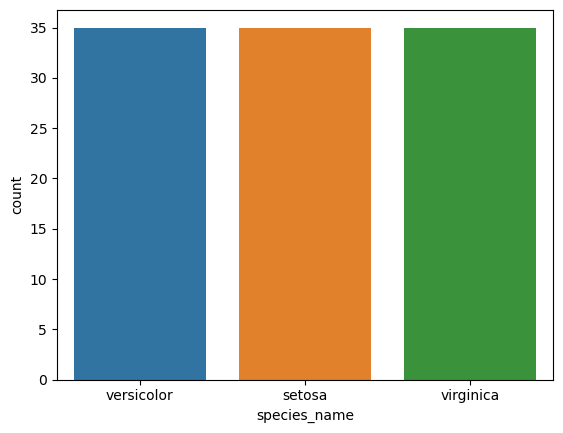

In [72]:
sns.countplot(data = train, x = 'species_name')


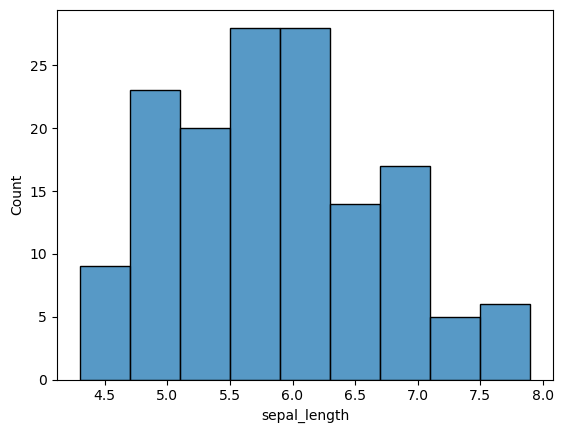

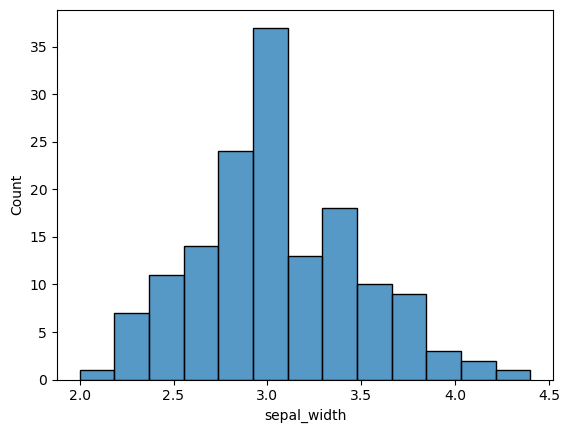

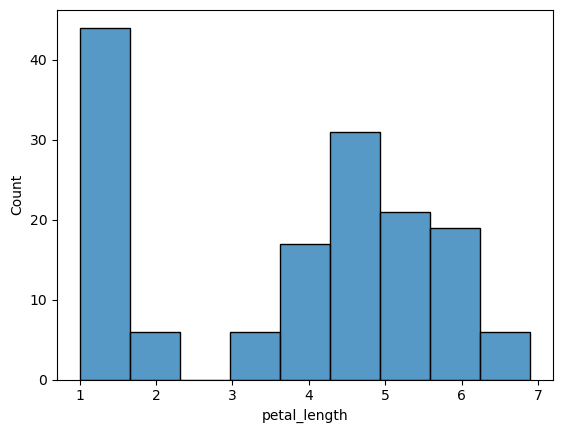

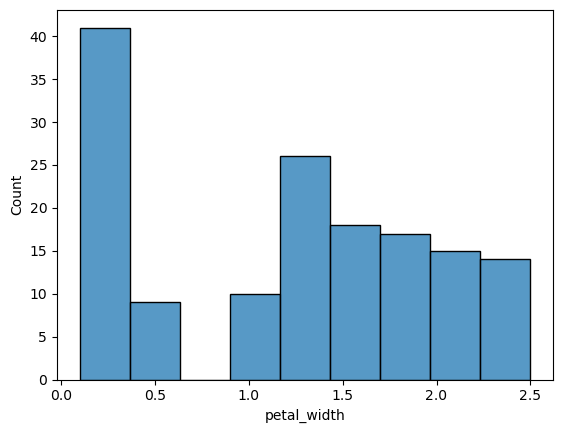

In [74]:
iris_quantitative_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for x in iris_quantitative_columns:
    plt.figure()
    sns.histplot(data = iris_df, x = x)

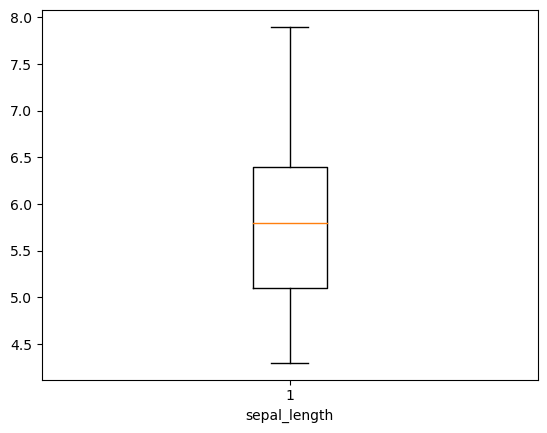

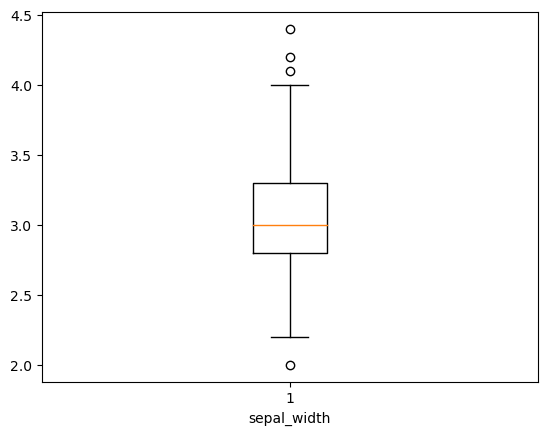

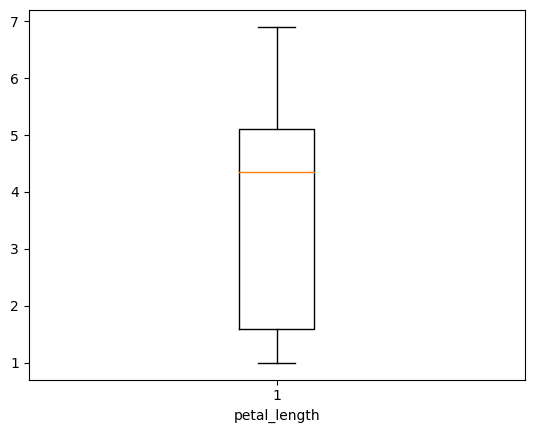

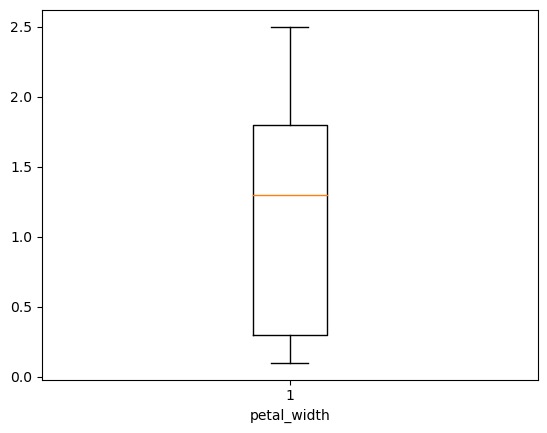

In [89]:
iris_quantitative_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for x in iris_quantitative_columns:
    plt.figure()
    plt.boxplot(data= iris_df, x=x)
    plt.xlabel(x)


In [87]:
iris_df.describe()

,species_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,5.843333,3.057333,3.758000,1.199333
std,0.819232,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,6.400000,3.300000,5.100000,1.800000
max,3.000000,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='species_name', ylabel='count'>

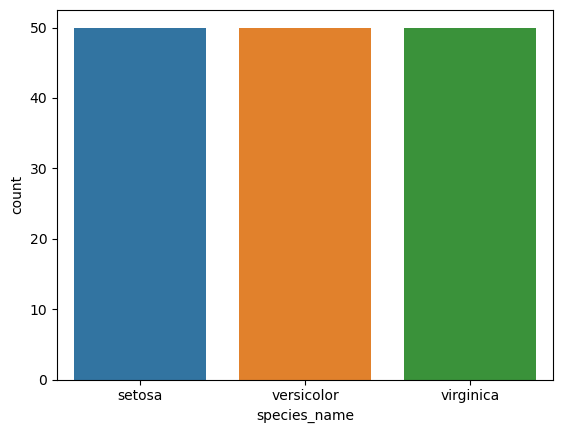

In [90]:
sns.countplot(data= iris_df, x= 'species_name')

#document take aways:
the plot shows they have the same distribution 
5 to 7 inches are the normal amount for flowers size

# bivariate stats

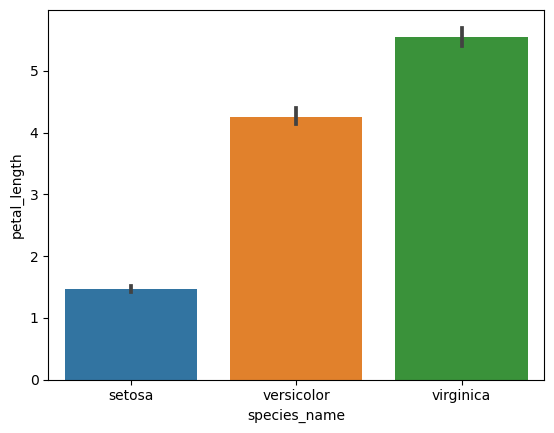

In [102]:
sns.barplot(data=iris_df, x = 'species_name', 
            y = 'petal_length')
plt.show()

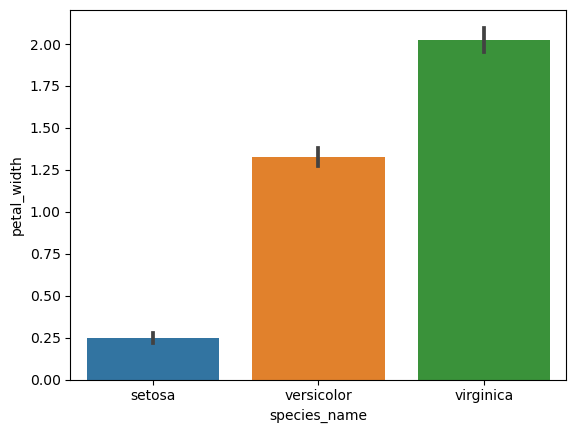

In [103]:
sns.barplot(data=iris_df, x='species_name', y = 'petal_width')
plt.show()

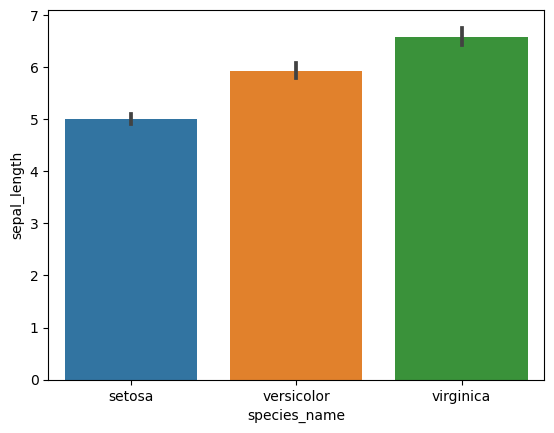

In [104]:
sns.barplot(data=iris_df, x='species_name', y='sepal_length')
plt.show()

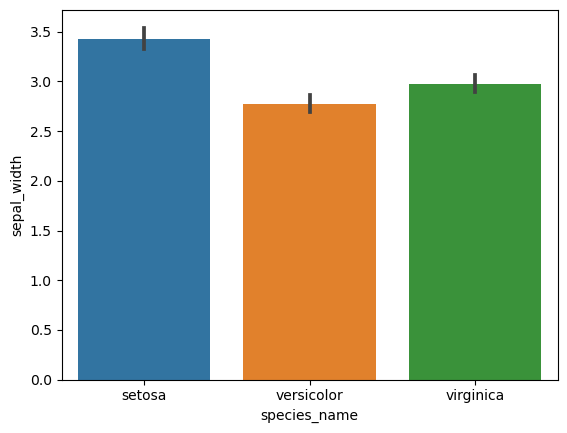

In [109]:
iris_sepal_width = sns.barplot(data=iris_df, x='species_name', y='sepal_width')

In [115]:
iris_df.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [117]:
iris_df['sepal_width'].describe()

count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: sepal_width, dtype: float64

In [118]:
iris_df['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [119]:
iris_df['petal_width'].describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal_width, dtype: float64

In [120]:
iris_df['petal_length'].describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

In [124]:
iris_df['species_name'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [125]:
from scipy.stats import mannwhitneyu

In [127]:

# Subset data for virginica and versicolor species
virginica_data = iris_df[iris_df['species_name'] == 'virginica']
versicolor_data = iris_df[iris_df['species_name'] == 'versicolor']

# List of quantitative columns
quantitative_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Perform Mann-Whitney U test for each measurement type
for col in quantitative_columns:
    stat, p_value = mannwhitneyu(virginica_data[col], versicolor_data[col])
    
    print(f"Mann-Whitney Test for {col} between 'virginica' and 'versicolor':")
    print(f"Statistic: {stat:.2f}")
    print(f"P-value: {p_value:.6f}")
    
    if p_value < 0.05:
        print("There is a significant difference.")
    else:
        print("There is no significant difference.")
    
    print('\n')


Mann-Whitney Test for sepal_length between 'virginica' and 'versicolor':
Statistic: 1974.00
P-value: 0.000001
There is a significant difference.


Mann-Whitney Test for sepal_width between 'virginica' and 'versicolor':
Statistic: 1659.00
P-value: 0.004572
There is a significant difference.


Mann-Whitney Test for petal_length between 'virginica' and 'versicolor':
Statistic: 2455.50
P-value: 0.000000
There is a significant difference.


Mann-Whitney Test for petal_width between 'virginica' and 'versicolor':
Statistic: 2451.00
P-value: 0.000000
There is a significant difference.




# multivariate stats

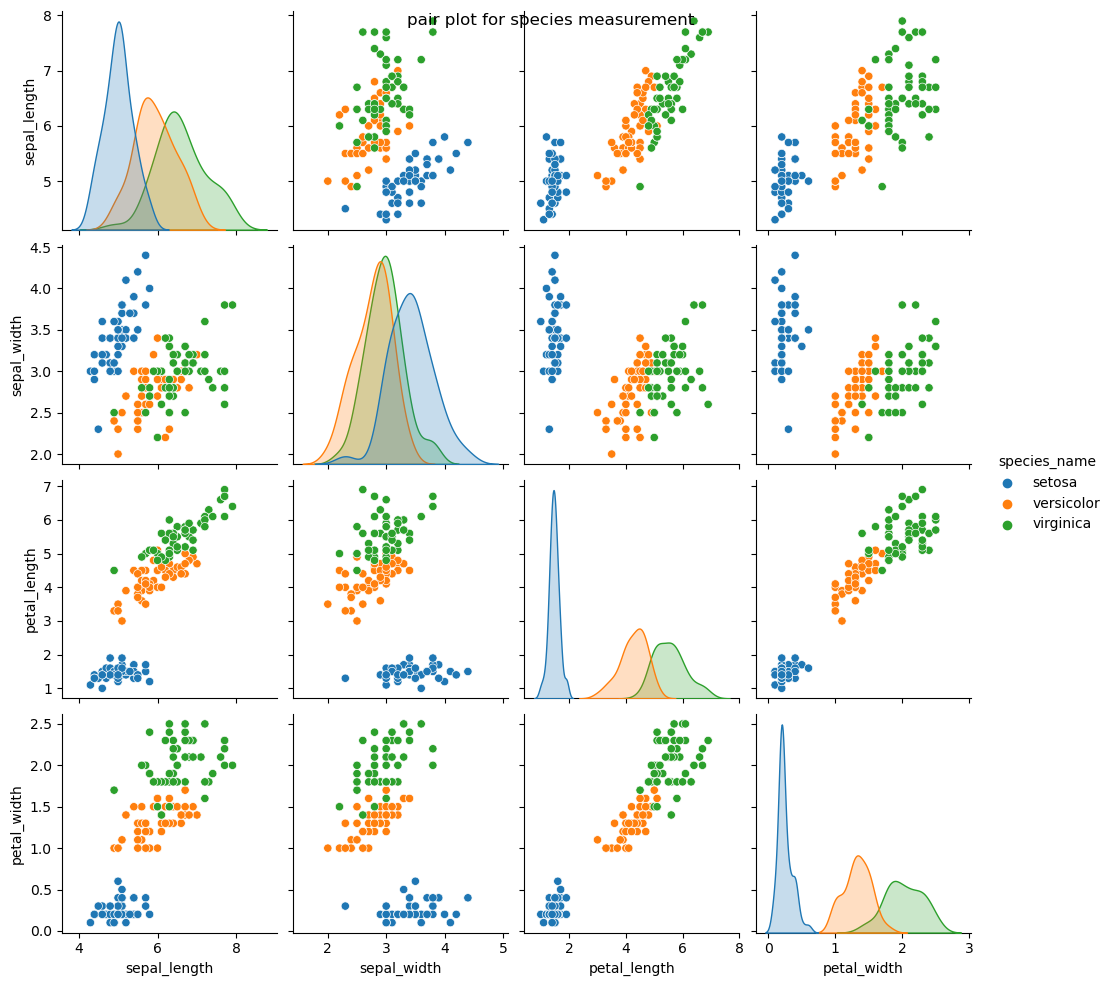

In [129]:
quantitative_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
sns.pairplot(data=iris_df, vars=quantitative_columns, hue='species_name')
plt.suptitle("pair plot for species measurement")
plt.show()

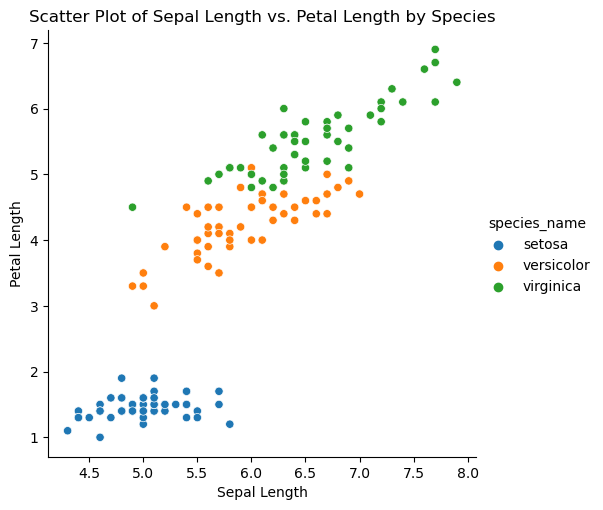

In [131]:
sns.relplot(data=iris_df, x='sepal_length', y='petal_length', hue='species_name', markers=True)
plt.title("Scatter Plot of Sepal Length vs. Petal Length by Species")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.show()

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).